In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# To display all columns of the dataframe.
pd.set_option("display.max_columns", None)

In [6]:
# Let's load the House Prices dataset
# and explore its shape (rows and columns).

data = pd.read_csv("train.csv")
data.shape

(1460, 81)

In [7]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:


# Find the variables with missing observations.

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]

vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
#check the numerical or categorical
data[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [14]:
# find the proportion of missing observation 
data_na = data[vars_with_na].isnull().mean()

# Transform the array into dataframe
data_na = pd.DataFrame(data_na.reset_index())
#add columns name to the dataframe
data_na.columns = ['variable','na_fraction']

# Order of dataframe according with null valu
data_na.sort_values(by='na_fraction',ascending=False,inplace=True)

#show 
data_na

,variable,na_fraction
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
2,MasVnrType,0.597260
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479


In [15]:
# Capture variables with less than 5% NA
# in a list.

vars_cca = [var for var in vars_with_na if data[var].isnull().mean() < 0.05]
vars_cca

['MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [18]:
# proportion of observatio
len(data.dropna(subset=vars_cca))/ len(data)

0.9671232876712329

In [19]:
data_cca = data.dropna(subset=vars_cca)
data.shape, data_cca.shape

((1460, 81), (1412, 81))

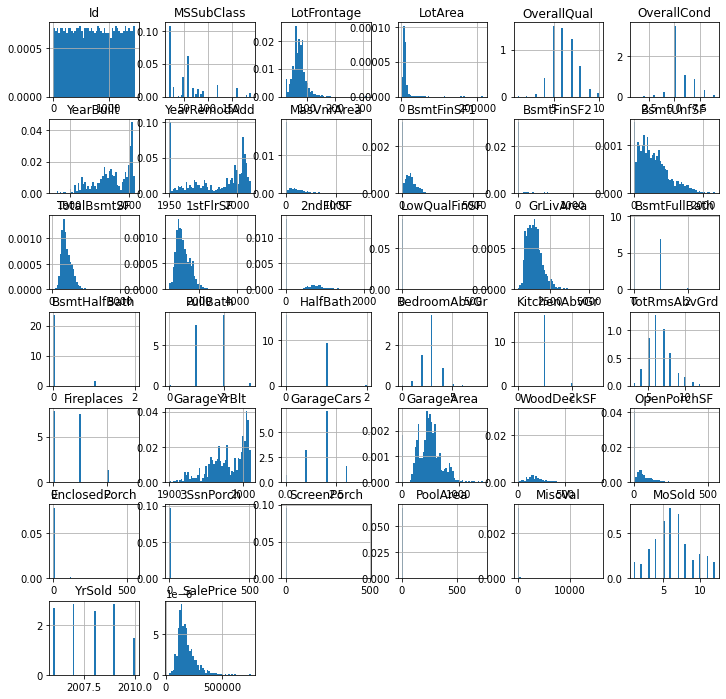

In [20]:
# Plot the histograms for all numerical variables in the complete
# case dataset (as we did in section 3).

data_cca.hist(bins=50, density=True, figsize=(12, 12))

plt.show()

#### 2-End-Distribution-Imputation

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split


In [25]:


# load the Titanic dataset with a few variables for demonstration

data = pd.read_csv("titanic.csv")
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [29]:
# prepare of training
X_train,X_test,y_train,y_test = train_test_split(
        data[['Age','Fare']],
    data['Survived'],
    test_size=0.3,
    random_state =0
)
X_train.shape,X_test.shape

((623, 2), (268, 2))

<AxesSubplot:>

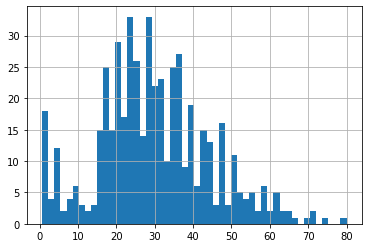

In [31]:
X_train.Age.hist(bins=50)

In [34]:
# far end of the distribution:

# Because Age looks approximately Gaussian, I use the
# mean and std to calculate the replacement value

X_train.Age.mean() + 3 * X_train.Age.std()



73.43632005918369

In [38]:
#replace NA with value calculated above
X_train['Age_imputed']  = X_train['Age'].fillna(
    X_train.Age.mean() + 3 * X_train.Age.std())
X_train.head(15)

,Age,Fare,Age_imputed
857,51.0,26.5500,51.00000
52,49.0,76.7292,49.00000
386,1.0,46.9000,1.00000
124,54.0,77.2875,54.00000
578,NaN,14.4583,73.43632
549,8.0,36.7500,8.00000
118,24.0,247.5208,24.00000
12,20.0,8.0500,20.00000
157,30.0,8.0500,30.00000
127,24.0,7.1417,24.00000


In [40]:
# we can see a change in the variance after end of tail imputation
# this is expected, because the percentage of missing data is quite
# high in Age ~20%

print("Original variable variance: ", X_train["Age"].var())
print("Variance after 99 imputation: ", X_train["Age_imputed"].var())


Original variable variance:  210.4528692463678
Variance after 99 imputation:  466.4111899213171


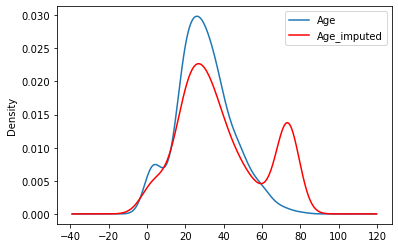

In [41]:
# we can see that the distribution has changed
# with now more values accumulating towards the tail

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["Age"].plot(kind="kde", ax=ax)

# imputed variable
X_train["Age_imputed"].plot(kind="kde", ax=ax, color="red")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")


In [42]:


# we also said end of tail imputation may affect the relationship
# with the other variables in the dataset, let's have a look

X_train[["Fare", "Age", "Age_imputed"]].cov()



,Fare,Age,Age_imputed
Fare,2328.801583,78.468894,-7.185565
Age,78.468894,210.452869,210.452869
Age_imputed,-7.185565,210.452869,466.411190


<AxesSubplot:>

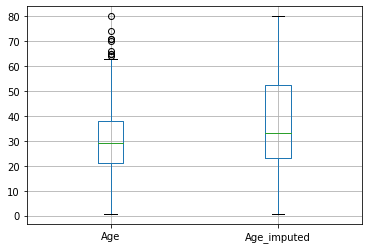

In [43]:


# Finally, I mentioned that end tail imputation may
# affect the perception of outliers

# Let's find out using a boxplot
X_train[["Age", "Age_imputed"]].boxplot()



### Random Sample Imputation

In [47]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv("titanic.csv", usecols=["Age", "Fare", "Survived"])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [52]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.Survived,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape



((623, 3), (268, 3))

In [54]:
# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
X_train["Age_imputed"] = X_train["Age"].copy()
X_test["Age_imputed"] = X_test["Age"].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = (
    X_train["Age"].dropna().sample(X_train["Age"].isnull().sum(), random_state=0)
)

random_sample_test = (
    X_train["Age"].dropna().sample(X_test["Age"].isnull().sum(), random_state=0)
)


# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train["Age"].isnull()].index
random_sample_test.index = X_test[X_test["Age"].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train["Age"].isnull(), "Age_imputed"] = random_sample_train
X_test.loc[X_test["Age"].isnull(), "Age_imputed"] = random_sample_test


In [55]:
# check that NA were imputed
X_train["Age_imputed"].isnull().sum()


0

In [56]:
# check that NA were imputed
X_test["Age_imputed"].isnull().sum()


0

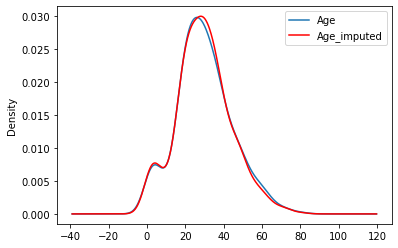

In [58]:
# we can see that the distribution of the variable after
# random sample imputation is almost exactly the same as the original

fig = plt.figure()
ax = fig.add_subplot(111)

X_train["Age"].plot(kind="kde", ax=ax)
X_train["Age_imputed"].plot(kind="kde", ax=ax, color="red")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")


In [63]:
# there is some change in the variance of the variable.
# however this change is much smaller compared to mean or median
# imputation (check the previous notebook for comparison)

print("Original variable variance: ", X_train["Age"].var())
print("Variance after random imputation: ", X_train["Age_imputed"].var())


Original variable variance:  210.4528692463678
Variance after random imputation:  201.59945157649173


In [64]:
# the covariance of Age with Fare is also less affected by this
# imputation technique compared to mean or median imputation

X_train[["Fare", "Age", "Age_imputed"]].cov()


,Fare,Age,Age_imputed
Fare,2328.801583,78.468894,83.260641
Age,78.468894,210.452869,210.452869
Age_imputed,83.260641,210.452869,201.599452


<AxesSubplot:>

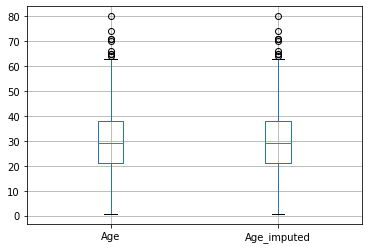

In [66]:
X_train[["Age", "Age_imputed"]].boxplot()

In [67]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 15

observation = data[data.Age.isnull()].head(1)
observation

,Survived,Age,Fare
5,0,NaN,8.4583


In [68]:
# extract a random value, just 1
sampled_value = X_train["Age"].dropna().sample(1)

# re index to 15
sampled_value.index = [15]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation["Age_random"] = sampled_value

observation

,Survived,Age,Fare,Age_random
5,0,NaN,8.4583,NaN
